In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px

In [5]:

pd.set_option('display.max_columns', None)

In [6]:
df = pd.read_csv('/content/gurgaon_properties_missing_value_removed.csv')
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,independent,sector 105,0.74,7400.0,3,3,0,2.0,Moderately Old,1000.0,0,0,0,0,0,0,0
1,flat,tulip ivory,sector 70,5.00,10417.0,6,7,3+,0.0,Relatively New,5333.0,1,1,0,0,0,0,119
2,flat,signature global park,sohna road,0.90,8036.0,3,2,2,2.0,Under Construction,1014.0,0,0,0,0,0,0,144
3,house,independent,sector 47,5.15,26615.0,3,9,3+,3.0,Relatively New,1935.0,0,0,1,0,0,1,75
4,flat,central park flower valley aqua front towers,sector 33,1.70,9503.0,3,3,3,12.0,Under Construction,1619.0,0,0,0,0,0,0,24


### 'society','price_per_sqft'----> drop these
* becouse for price prediction we cant ask to user for tell which society you want, also asking price_per_sqft is not logical

In [7]:
train_df = df.drop(columns=['society','price_per_sqft'])

In [12]:
train_df.head(2)

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,sector 105,0.74,3,3,0,2.0,Moderately Old,1000.0,0,0,0,0,0,0,0
1,flat,sector 70,5.00,6,7,3+,0.0,Relatively New,5333.0,1,1,0,0,0,0,119


# luxury score

<Axes: xlabel='luxury_score'>

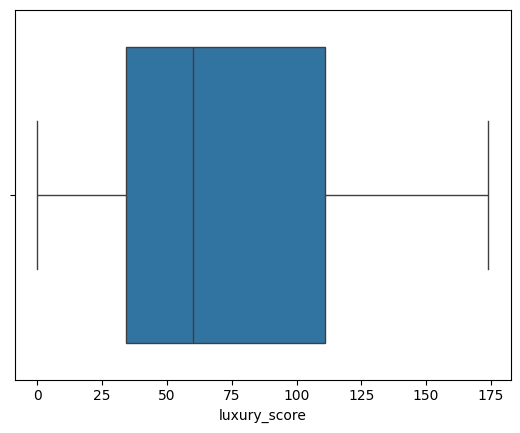

In [21]:
sns.boxplot(x=df['luxury_score'])

### making it as category ( Reason ) ----
* becouse we cant go to ask to user that tell me what luxury_score you want (use dont know your luxury range )
* also any user dont that much specific that .. i want i flat which is 59% luxury ( its not logical )


In [32]:
def categorize_luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None

In [33]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [34]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,house,sector 105,0.74,3,3,0,2.0,Moderately Old,1000.0,0,0,0,0,0,0,0,Low
1,flat,sector 70,5.00,6,7,3+,0.0,Relatively New,5333.0,1,1,0,0,0,0,119,Medium
2,flat,sohna road,0.90,3,2,2,2.0,Under Construction,1014.0,0,0,0,0,0,0,144,Medium
3,house,sector 47,5.15,3,9,3+,3.0,Relatively New,1935.0,0,0,1,0,0,1,75,Medium
4,flat,sector 33,1.70,3,3,3,12.0,Under Construction,1619.0,0,0,0,0,0,0,24,Low


# floor Num

<Axes: xlabel='floorNum'>

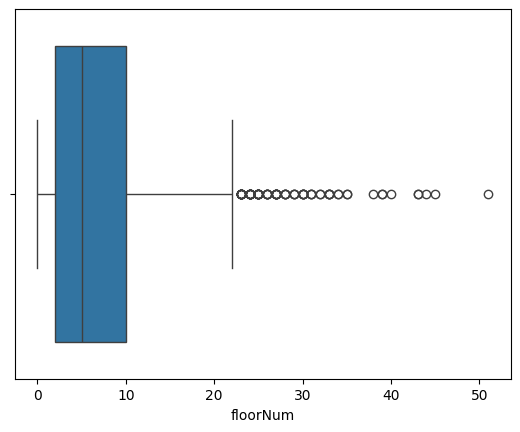

In [36]:
sns.boxplot(x = df['floorNum'])

### also convert this in category ( we just give 3 category to user ) for choosing flat floor (low, mid, high)

In [37]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None

In [38]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [39]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,house,sector 105,0.74,3,3,0,2.0,Moderately Old,1000.0,0,0,0,0,0,0,0,Low,Low Floor
1,flat,sector 70,5.00,6,7,3+,0.0,Relatively New,5333.0,1,1,0,0,0,0,119,Medium,Low Floor
2,flat,sohna road,0.90,3,2,2,2.0,Under Construction,1014.0,0,0,0,0,0,0,144,Medium,Low Floor
3,house,sector 47,5.15,3,9,3+,3.0,Relatively New,1935.0,0,0,1,0,0,1,75,Medium,Mid Floor
4,flat,sector 33,1.70,3,3,3,12.0,Under Construction,1619.0,0,0,0,0,0,0,24,Low,High Floor


In [40]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

# now Encode all category column into numbers

In [41]:
from sklearn.preprocessing import OrdinalEncoder

data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'sector 1',
       'sector 102', 'sector 103', 'sector 104', 'sector 105',
       'sector 106', 'sector 107', 'sector 108', 'sector 109',
       'sector 10a', 'sector 11', 'sector 110', 'sector 111',
       'sector 112', 'sector 113', 'sector 12', 'sector 13', 'sector 14',
       'sector 15', 'sector 17', 'sector 17a', 'sector 17b', 'sector 1a',
       'sector 2', 'sector 21', 'sector 22', 'sector 23', 'sector 24',
       'sector 25', 'sector 26', 'sector 27', 'sector 28', 'sector 3',
       'sector 3 phase 2', 'sector 30', 'sector 31', 'sector 33',
       'sector 36', 'sector 36a', 'sector 37', 'sector 37c', 'sector 37d',
       'sector 38', 'sector 39', 'sector 4', 'sector 40', 'sector 41',
       'sector 43', 'sector 45', 'sector 46', 'sector 47', 'sector 48',
       'sector 49', 'sector 5', 'sector 50', 'sector 51', 'sector 52',
       'sector 53', 'sector 54', 'sector 55', 'sector 56', 

In [42]:
data_label_encoded.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,1.0,7.0,0.74,3,3,0.0,0.0,1000.0,0,0,0,0,0,0,1.0,1.0
1,0.0,80.0,5.00,6,7,4.0,3.0,5333.0,1,1,0,0,0,0,2.0,1.0
2,0.0,112.0,0.90,3,2,2.0,4.0,1014.0,0,0,0,0,0,0,2.0,1.0
3,1.0,53.0,5.15,3,9,4.0,3.0,1935.0,0,0,1,0,0,1,2.0,2.0
4,0.0,39.0,1.70,3,3,3.0,4.0,1619.0,0,0,0,0,0,0,1.0,0.0


# input and output data splits

In [43]:

# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

In [46]:
X_label.sample(10)

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
1401,0.0,85.0,2,2,4.0,3.0,1200.0,0,0,0,0,1,0,2.0,0.0
1231,0.0,92.0,4,5,4.0,3.0,2577.0,0,1,0,0,0,2,0.0,2.0
2186,1.0,29.0,3,2,0.0,2.0,3078.0,0,0,0,0,1,0,1.0,1.0
3520,0.0,69.0,2,2,2.0,1.0,1278.0,1,0,0,1,0,0,2.0,2.0
276,0.0,78.0,3,2,2.0,0.0,1473.0,0,0,0,0,0,0,1.0,0.0
302,0.0,1.0,4,4,4.0,1.0,4842.0,1,1,1,1,0,1,0.0,0.0
2986,0.0,66.0,3,4,3.0,1.0,3361.0,0,1,0,0,0,1,1.0,0.0
3108,0.0,44.0,4,3,3.0,3.0,1808.0,0,0,0,0,1,1,1.0,0.0
117,0.0,50.0,4,4,4.0,0.0,3115.0,0,0,0,1,0,1,2.0,0.0
1072,0.0,82.0,3,4,2.0,3.0,1577.0,1,1,0,1,1,2,2.0,0.0


# Now --->
### we apply 8 Techniques for feature selection ( we calculate the feature importence by using avg of all these models ) ----> its like ensemble

# Technique 1 - Correlation Analysis



<Axes: >

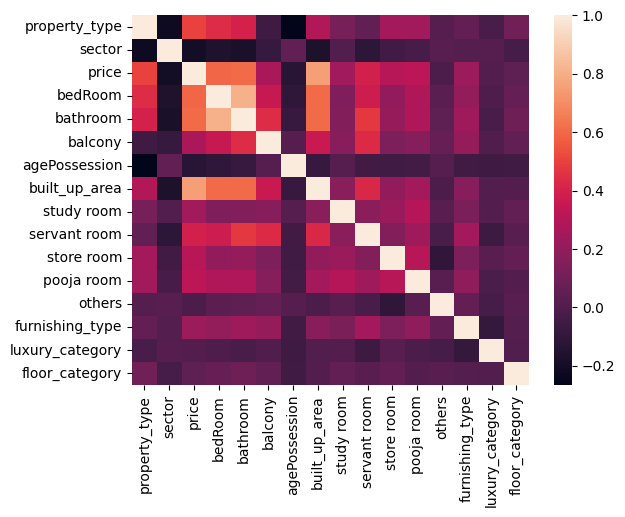

In [47]:
sns.heatmap(data_label_encoded.corr())

In [56]:
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1

,feature,corr_coeff
0,sector,-0.202240
1,price,1.000000
2,bedRoom,0.591632
3,bathroom,0.609229
4,balcony,0.269995
5,agePossession,-0.132597
6,built_up_area,0.748640
7,study room,0.243079
8,servant room,0.392086
9,store room,0.305744


# Technique 2 - Random Forest Feature Importance

In [57]:
# also remember we always use tree base model --------->

    # becuase linear model label_encoder vali values (0,1,2) me 2 ko more importent value samjhne lagenge)
    # tree base model are just split data, they dont care which value big or small


from sklearn.ensemble import RandomForestRegressor

rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores-----> (by rf_label.feature_importances_)
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
6,built_up_area,0.646646
0,property_type,0.102787
1,sector,0.102358
2,bedRoom,0.028734
3,bathroom,0.023026
8,servant room,0.021027
5,agePossession,0.015297
4,balcony,0.012281
12,furnishing_type,0.010154
9,store room,0.008945


# Technique 3 - Gradient Boosting Feature importances

In [58]:
from sklearn.ensemble import GradientBoostingRegressor

gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
6,built_up_area,0.686510
1,sector,0.103484
0,property_type,0.097430
2,bedRoom,0.036102
3,bathroom,0.032758
8,servant room,0.020312
9,store room,0.009642
5,agePossession,0.004168
7,study room,0.003522
12,furnishing_type,0.003178


# Technique 4 - Permutation Importance

In [59]:
''' Step-by-step breakdown:
Let's say you have:
10 features in X_test_label
n_repeats = 30
'''

# 1.   The model is trained once on X_train_label.

# 2.   For each of the 10 features:
      # It creates 30 shuffled versions of that feature in X_test_label.
      # Each time, it replaces the real column with a shuffled one and measures the drop in performance (e.g., R²).
      # This gives you 30 scores per feature, which are then averaged.

" Step-by-step breakdown:\nLet's say you have:\n10 features in X_test_label\nn_repeats = 30\n"

In [60]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
6,built_up_area,0.678143
0,property_type,0.166959
1,sector,0.128658
2,bedRoom,0.055839
8,servant room,0.018572
3,bathroom,0.017461
9,store room,0.005467
10,pooja room,0.004725
14,floor_category,0.003042
13,luxury_category,0.002276


# Technique 5 - LASSO
### 1st linear model ( hence need to scaling )


In [61]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5

,feature,lasso_coeff
6,built_up_area,1.511676
0,property_type,0.712532
3,bathroom,0.270860
9,store room,0.199766
7,study room,0.171947
12,furnishing_type,0.168451
8,servant room,0.162174
10,pooja room,0.074139
13,luxury_category,0.056265
2,bedRoom,0.020076


# Technique 6 - RFE
### ( most perfect )

In [62]:
from sklearn.feature_selection import RFE

estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

In [63]:
fi_df6

,feature,rfe_score
6,built_up_area,0.648718
1,sector,0.103798
0,property_type,0.102266
2,bedRoom,0.026134
3,bathroom,0.024130
8,servant room,0.020189
5,agePossession,0.015568
4,balcony,0.011928
12,furnishing_type,0.009253
7,study room,0.008365


# Technique 7 - Linear Regression Weights

In [65]:
# Train a linear regression model on the label-encoded and standardized training data
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7


,feature,reg_coeffs
6,built_up_area,1.514217
0,property_type,0.713205
3,bathroom,0.277417
9,store room,0.204153
7,study room,0.179829
12,furnishing_type,0.178021
8,servant room,0.171527
10,pooja room,0.077128
13,luxury_category,0.067887
2,bedRoom,0.022792


# shap

In [76]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values

array([[ 0.54921764, -0.14298169, -0.07758948, ..., -0.01394936,
        -0.01417144, -0.01301245],
       [-1.09376498, -0.18957408,  0.06178476, ..., -0.01498674,
        -0.01518225, -0.03319491],
       [-0.18266481, -0.40598477, -0.02349833, ..., -0.01394795,
         0.00258713, -0.00645042],
       ...,
       [ 1.44596482,  0.64515003,  0.13923597, ...,  0.00633498,
        -0.02506291,  0.03891079],
       [-0.49909908,  0.82378563,  0.01292775, ...,  0.01336769,
         0.02051034,  0.00877854],
       [-0.49211911, -0.24441354, -0.02986859, ..., -0.04407911,
         0.01807354, -0.12796031]])

In [86]:
fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

,feature,SHAP_score
6,built_up_area,1.247435
0,property_type,0.476126
1,sector,0.380992
3,bathroom,0.108360
8,servant room,0.094024
2,bedRoom,0.060942
4,balcony,0.039545
12,furnishing_type,0.029922
5,agePossession,0.027194
14,floor_category,0.025349


In [87]:

final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').merge(fi_df8,on='feature').set_index('feature')

In [88]:
final_fi_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
sector,-0.202240,0.102358,0.103484,0.128658,-0.059964,0.103798,-0.069029,0.380992
bedRoom,0.591632,0.028734,0.036102,0.055839,0.020076,0.026134,0.022792,0.060942
bathroom,0.609229,0.023026,0.032758,0.017461,0.270860,0.024130,0.277417,0.108360
balcony,0.269995,0.012281,0.001793,0.000993,-0.044202,0.011928,-0.067026,0.039545
agePossession,-0.132597,0.015297,0.004168,0.001416,0.000000,0.015568,0.003414,0.027194
built_up_area,0.748640,0.646646,0.686510,0.678143,1.511676,0.648718,1.514217,1.247435
study room,0.243079,0.008325,0.003522,0.000989,0.171947,0.008365,0.179829,0.018641
servant room,0.392086,0.021027,0.020312,0.018572,0.162174,0.020189,0.171527,0.094024
store room,0.305744,0.008945,0.009642,0.005467,0.199766,0.007562,0.204153,0.018492


In [89]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [90]:

final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)

,0
feature,
built_up_area,0.708001
sector,0.133420
bedRoom,0.038220
bathroom,0.031965
servant room,0.026749
agePossession,0.010719
balcony,0.009804
store room,0.008779
furnishing_type,0.008332


In [83]:

# to drop pooja room, study room, others
X_label.head()

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,1.0,7.0,3,3,0.0,0.0,1000.0,0,0,0,0,0,0,1.0,1.0
1,0.0,80.0,6,7,4.0,3.0,5333.0,1,1,0,0,0,0,2.0,1.0
2,0.0,112.0,3,2,2.0,4.0,1014.0,0,0,0,0,0,0,2.0,1.0
3,1.0,53.0,3,9,4.0,3.0,1935.0,0,0,1,0,0,1,2.0,2.0
4,0.0,39.0,3,3,3.0,4.0,1619.0,0,0,0,0,0,0,1.0,0.0


# checking----> (pooja room, study room, others) these column are realy imp or not

In [91]:
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')


In [92]:

scores.mean()

np.float64(0.7849755688867632)

In [93]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'study room', 'others']), y_label, cv=5, scoring='r2')

In [94]:
scores.mean()

np.float64(0.7828031069118147)

In [95]:

export_df = X_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_label

In [96]:
export_df.to_csv('gurgaon_properties_post_feature_selection.csv', index=False)

In [98]:
export_df.head()

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category,price
0,1.0,7.0,3,3,0.0,0.0,1000.0,0,0,0,1.0,1.0,0.74
1,0.0,80.0,6,7,4.0,3.0,5333.0,1,0,0,2.0,1.0,5.00
2,0.0,112.0,3,2,2.0,4.0,1014.0,0,0,0,2.0,1.0,0.90
3,1.0,53.0,3,9,4.0,3.0,1935.0,0,1,1,2.0,2.0,5.15
4,0.0,39.0,3,3,3.0,4.0,1619.0,0,0,0,1.0,0.0,1.70
